In [2]:
# Import dependencies

import pandas as pd

In [3]:
# Set path for CSV files

oscars_file = "Resources/the_oscar_award.csv"
oscars_df = pd.read_csv(oscars_file)


movies_file = "Resources/movies.csv"
movies_df = pd.read_csv(movies_file)




In [4]:

df3 = oscars_df[oscars_df["winner"]==1].groupby(["film", "category"])["winner"].count()
df4 = df3.to_frame().reset_index().rename(columns={"film":"Title", "winner":"Wins"})
df4 = df4["Title"].value_counts().to_frame().reset_index().rename(columns={"index":"Title", "Title":"Wins"})
df4

,Title,Wins
0,Titanic,12
1,Ben-Hur,11
2,The Lord of the Rings: The Return of the King,11
3,West Side Story,10
4,Gigi,9
...,...,...
1268,Young at Heart,1
1269,Anchors Aweigh,1
1270,Two Arabian Knights,1
1271,The Trip to Bountiful,1


In [5]:
movies_df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [6]:
df = oscars_df.groupby(["film", "category"])["winner"].count()
df2 = df.to_frame().reset_index()
df2.rename(columns={"index":"Title", "film":"Nomination"})
df2

,film,category,winner
0,"$1,000 a Minute",SOUND RECORDING,1
1,'38',FOREIGN LANGUAGE FILM,1
2,'Crocodile' Dundee,WRITING (Screenplay Written Directly for the S...,1
3,'Round Midnight,ACTOR IN A LEADING ROLE,1
4,'Round Midnight,MUSIC (Original Score),1
...,...,...,...
9971,the end,SHORT FILM (Animated),1
9972,tom thumb,SPECIAL EFFECTS,1
9973,À Nous la Liberté,ART DIRECTION,1
9974,Ådalen '31,FOREIGN LANGUAGE FILM,1


In [7]:
#count of total Oscar nominations

df = oscars_df["film"].value_counts()
df2 = df.to_frame().reset_index().rename(columns={"index":"Title", "film":"Nomination"})
df2

,Title,Nomination
0,A Star Is Born,25
1,Titanic,16
2,Mutiny on the Bounty,15
3,Moulin Rouge,15
4,Little Women,14
...,...,...
4828,Laughter,1
4829,Gates of Paris,1
4830,Last Men in Aleppo,1
4831,Facing Fear,1


In [8]:
len(df2)

4833

In [9]:
wins_nominations_df = pd.merge(df2, df4, on="Title", how="left")
wins_nominations_df.fillna(0)

,Title,Nomination,Wins
0,A Star Is Born,25,2.0
1,Titanic,16,12.0
2,Mutiny on the Bounty,15,1.0
3,Moulin Rouge,15,4.0
4,Little Women,14,3.0
...,...,...,...
4828,Laughter,1,0.0
4829,Gates of Paris,1,0.0
4830,Last Men in Aleppo,1,0.0
4831,Facing Fear,1,0.0


In [10]:
# df2 = pd.DataFrame(df)

In [11]:
len(df2)

4833

In [12]:
movies_clean_df = movies_df.drop(columns=["Unnamed: 0", "ID"])
movies_clean_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [13]:
len(movies_clean_df)

16744

In [14]:
# Clean and prepare dataframes for merge

# Filter category by Best Motion Picture only
best_picture = ['BEST PICTURE', 'BEST MOTION PICTURE']
oscars_clean_df = oscars_df[oscars_df.category.isin(best_picture)]


# Drop and rename columns
oscars_clean_df = oscars_clean_df.drop(columns=["year_ceremony", "category", "ceremony", "name"])
oscars_clean_df = oscars_clean_df.rename(columns={"year_film": "Year", "film": "Title", "winner": "Won Best Picture"})

oscars_clean_df

,Year,Title,Won Best Picture
1751,1944,Double Indemnity,False
1752,1944,Gaslight,False
1753,1944,Going My Way,True
1754,1944,Since You Went Away,False
1755,1944,Wilson,False
...,...,...,...
10346,2019,Little Women,False
10347,2019,Marriage Story,False
10348,2019,1917,False
10349,2019,Once upon a Time...in Hollywood,False


In [15]:
len(oscars_clean_df)

423

In [16]:
# Merge on left dataframe to keep all streaming movies
movies_clean_df2 = pd.merge(movies_clean_df, wins_nominations_df, on="Title", how="left")
combined_df = pd.merge(movies_clean_df2, oscars_clean_df, how="left")
combined_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,False
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,NaN
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,NaN,NaN
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,NaN
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,NaN,NaN,NaN


In [17]:
len(combined_df)

16744

In [18]:
combined_df[(combined_df["Netflix"]==1) & (combined_df["Won Best Picture"].isna()==False)].count()

Title               32
Year                32
Age                 32
IMDb                32
Rotten Tomatoes     32
Netflix             32
Hulu                32
Prime Video         32
Disney+             32
Type                32
Directors           31
Genres              32
Country             32
Language            32
Runtime             32
Nomination          32
Wins                26
Won Best Picture    32
dtype: int64

In [19]:
combined_df["Won Best Picture"]

0        False
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
16739      NaN
16740      NaN
16741      NaN
16742      NaN
16743      NaN
Name: Won Best Picture, Length: 16744, dtype: object

In [20]:
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].replace(True, 2)
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].replace(False, 1)
combined_df["Won Best Picture"] = combined_df["Won Best Picture"].fillna(0)

In [21]:
#sort oscar noms by highest IMDb rating
combined_df[(combined_df["Netflix"]==1) & (combined_df["Won Best Picture"]!=0)].sort_values("IMDb", ascending=False).head(5)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
6,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0,7.0,3.0,1.0
7,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0,5.0,2.0,1.0
8,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0,9.0,5.0,1.0
9,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0,8.0,1.0,1.0


In [22]:
combined_df["Won Best Picture"]

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16739    0.0
16740    0.0
16741    0.0
16742    0.0
16743    0.0
Name: Won Best Picture, Length: 16744, dtype: float64

In [23]:
combined_df.dtypes

Title                object
Year                  int64
Age                  object
IMDb                float64
Rotten Tomatoes      object
Netflix               int64
Hulu                  int64
Prime Video           int64
Disney+               int64
Type                  int64
Directors            object
Genres               object
Country              object
Language             object
Runtime             float64
Nomination          float64
Wins                float64
Won Best Picture    float64
dtype: object

In [24]:
combined_df

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,0.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,NaN,0.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,0.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0,NaN,NaN,0.0
16740,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0,NaN,NaN,0.0
16741,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN,NaN,NaN,0.0
16742,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN,NaN,NaN,0.0


In [25]:
combined_df
combined_df["Nomination"] = combined_df["Nomination"].fillna(0)
combined_df["Runtime"] = combined_df["Runtime"].fillna(0)
combined_df["Wins"] = combined_df["Wins"].fillna(0)
combined_df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,0.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,0.0,0.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,0.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0.0,0.0,0.0


In [26]:
combined_df2 = combined_df.fillna("Unknown")
combined_df2.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,Nomination,Wins,Won Best Picture
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,8.0,4.0,1.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,4.0,4.0,0.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,1.0,0.0,0.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,4.0,1.0,0.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,0.0,0.0,0.0


What are the top genres for each streaming service?

In [27]:
#TOTAL: Count of number or movies per genre
genre_count = {}
for Genres in combined_df2["Genres"].values:

    genres_list = Genres.split(",")
    
    for genre in genres_list:
        genre = genre.strip()
        if genre not in genre_count:
            genre_count[genre]=0
        genre_count[genre] +=1
    
#genre_count

genre_name = genre_count.keys() 
count_genre = genre_count.values() 
# print("Genres : ", str(genre_name)) 
# print("Count : ", str(count_genre))


allgenres_df=pd.DataFrame(count_genre, index=genre_name)
allgenres_df.head(5)

,0
Action,2683
Adventure,1778
Sci-Fi,1228
Thriller,3354
Comedy,4637


In [28]:
#NETFLIX: Count of number or movies per genre

netflix_genre_data= combined_df2[["Title", "Netflix", "Genres", "Wins"]].drop_duplicates()
netflix_genre_data2=netflix_genre_data.loc[netflix_genre_data["Netflix"]==1]
netflix_genre_data2.head()

,Title,Netflix,Genres,Wins
0,Inception,1,"Action,Adventure,Sci-Fi,Thriller",4.0
1,The Matrix,1,"Action,Sci-Fi",4.0
2,Avengers: Infinity War,1,"Action,Adventure,Sci-Fi",0.0
3,Back to the Future,1,"Adventure,Comedy,Sci-Fi",1.0
4,"The Good, the Bad and the Ugly",1,Western,0.0


In [82]:
net_genre_count = {}

for Genres in netflix_genre_data2["Genres"].values:

    net_genres_list = Genres.split(",")
    
    for genre in net_genres_list:
        genre = genre.strip()
        if genre not in net_genre_count:
            net_genre_count[genre]=0
        net_genre_count[genre] +=1
    
# net_genre_count

#Splitting dictionary into seperate lists in order to create DataFrame
net_genre_name = net_genre_count.keys() 
net_genre_count = net_genre_count.values() 

#Creating DataFrame for the top 10 genres
netflix_genre_df=pd.DataFrame(net_genre_count, index=net_genre_name)
netflix_genre_df= netflix_genre_df[0].sort_values(ascending=False).reset_index().rename(columns={"index":"Genre", 0:"Genre Count"})

top_netflix_genres= netflix_genre_df[0:10]
top_netflix_genres

#Adding Percentages

netflix_total= top_netflix_genres["Genre Count"].sum()
netflix_percentages= ((top_netflix_genres["Genre Count"]/netflix_total).apply('{:.0%}'.format))
idx=2
top_netflix_genres.insert(loc=idx,column="Percentage", value=netflix_percentages)
top_netflix_genres

,Genre,Genre Count,Percentage
0,Drama,1501,24%
1,Comedy,1308,21%
2,Thriller,652,10%
3,Romance,551,9%
4,Action,545,9%
5,Documentary,511,8%
6,Crime,372,6%
7,Adventure,318,5%
8,Family,315,5%
9,Horror,266,4%


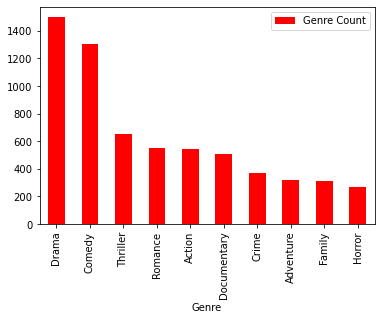

In [30]:
#NETFLIX GENRES: Bar Graph

top_netflix_genres.plot.bar(x='Genre', y='Genre Count', rot=90, color='r')

In [31]:
#HULU: Count of number or movies per genre

hulu_genre_data= combined_df2[["Title", "Hulu", "Genres", "Wins"]].drop_duplicates()
hulu_genre_data2=hulu_genre_data.loc[hulu_genre_data["Hulu"]==1]
hulu_genre_data2.head()

,Title,Hulu,Genres,Wins
67,Blackfish,1,"Documentary,News",0.0
97,Jiro Dreams of Sushi,1,Documentary,0.0
146,The Patriot,1,"Action,Drama,History,War",1.0
148,The Square,1,"Comedy,Drama",0.0
214,Hitch,1,"Comedy,Romance",0.0


In [78]:
hulu_genre_count = {}

for Genres in hulu_genre_data2["Genres"].values:

    hulu_genres_list = Genres.split(",")
    
    for genre in hulu_genres_list:
        genre = genre.strip()
        if genre not in hulu_genre_count:
            hulu_genre_count[genre]=0
        hulu_genre_count[genre] +=1
    
# hulu_genre_count

#Splitting dictionary into seperate lists in order to create DataFrame
hulu_genre_name = hulu_genre_count.keys() 
hulu_genre_count = hulu_genre_count.values() 

#Creating DataFrame for the top 10 genres
hulu_genre_df=pd.DataFrame(hulu_genre_count, index=hulu_genre_name)
hulu_genre_df= hulu_genre_df[0].sort_values(ascending=False).reset_index().rename(columns={"index":"Genre", 0:"Genre Count"})

top_hulu_genres= hulu_genre_df[0:10]
top_hulu_genres

#Adding Percentages

hulu_total= top_hulu_genres["Genre Count"].sum()
hulu_percentages= ((top_hulu_genres["Genre Count"]/hulu_total).apply('{:.0%}'.format))
idx=2
top_hulu_genres.insert(loc=idx,column="Percentage", value=hulu_percentages)
top_hulu_genres


,Genre,Genre Count,Percentage
0,Drama,438,25%
1,Comedy,272,15%
2,Thriller,221,12%
3,Romance,151,8%
4,Documentary,132,7%
5,Action,129,7%
6,Horror,124,7%
7,Adventure,111,6%
8,Family,105,6%
9,Crime,100,6%


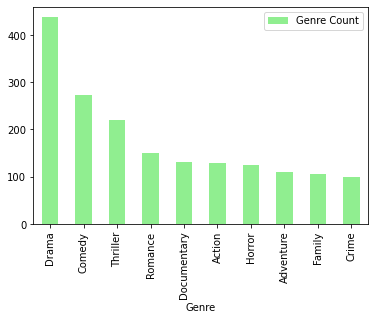

In [80]:
#HULU GENRES: Bar Graph
top_hulu_genres.plot.bar(x='Genre', y='Genre Count', rot=90, color='lightgreen')

In [34]:
#Prime Video: Count of number or movies per genre

prime_genre_data= combined_df2[["Title", "Prime Video", "Genres", "Wins"]].drop_duplicates()
prime_genre_data2=prime_genre_data.loc[prime_genre_data["Prime Video"]==1]
prime_genre_data2.head()

,Title,Prime Video,Genres,Wins
4,"The Good, the Bad and the Ugly",1,Western,0.0
6,The Pianist,1,"Biography,Drama,Music,War",3.0
11,3 Idiots,1,"Comedy,Drama",0.0
15,Once Upon a Time in the West,1,Western,0.0
31,Drive,1,"Crime,Drama",0.0


In [77]:
prime_genre_count = {}

for Genres in prime_genre_data2["Genres"].values:

    prime_genres_list = Genres.split(",")
    
    for genre in prime_genres_list:
        genre = genre.strip()
        if genre not in prime_genre_count:
            prime_genre_count[genre]=0
        prime_genre_count[genre] +=1
    
# prime_genre_count

#Splitting dictionary into seperate lists in order to create DataFrame
prime_genre_name = prime_genre_count.keys() 
prime_genre_count = prime_genre_count.values() 

#Creating DataFrame for the top 10 genres
prime_genre_df=pd.DataFrame(prime_genre_count, index=prime_genre_name)
prime_genre_df= prime_genre_df[0].sort_values(ascending=False).reset_index().rename(columns={"index":"Genre", 0:"Genre Count"})

top_prime_genres= prime_genre_df[0:10]
top_prime_genres

#Adding Percentages

prime_total= top_prime_genres["Genre Count"].sum()
prime_percentages= ((top_prime_genres["Genre Count"]/prime_total).apply('{:.0%}'.format))
idx=2
top_prime_genres.insert(loc=idx,column="Percentage", value=prime_percentages)
top_prime_genres


,Genre,Genre Count,Percentage
0,Drama,5437,25%
1,Comedy,3004,14%
2,Thriller,2632,12%
3,Action,2049,9%
4,Documentary,1895,9%
5,Horror,1878,8%
6,Romance,1691,8%
7,Crime,1423,6%
8,Adventure,1166,5%
9,Mystery,983,4%


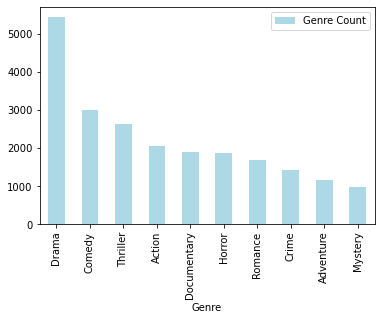

In [79]:
#PRIME VIDEO GENRES: Bar Graph
top_prime_genres.plot.bar(x='Genre', y='Genre Count', rot=90, color='lightblue')

In [74]:
#Prime Video: Count of number or movies per genre

disney_genre_data= combined_df2[["Title", "Disney+", "Genres", "Wins"]].drop_duplicates()
disney_genre_data2=disney_genre_data.loc[disney_genre_data["Disney+"]==1]
disney_genre_data2.head()

,Title,Disney+,Genres,Wins
95,Saving Mr. Banks,1,"Biography,Comedy,Drama",0.0
103,Amy,1,Drama,1.0
122,Bolt,1,"Animation,Adventure,Comedy,Drama,Family",0.0
125,The Princess and the Frog,1,"Animation,Adventure,Comedy,Family,Fantasy,Musi...",0.0
150,Miracle,1,"Biography,Drama,History,Sport",0.0


In [75]:
disney_genre_count = {}

for Genres in disney_genre_data2["Genres"].values:

    disney_genres_list = Genres.split(",")
    
    for genre in disney_genres_list:
        genre = genre.strip()
        if genre not in disney_genre_count:
            disney_genre_count[genre]=0
        disney_genre_count[genre] +=1
    
# disney_genre_count

#Splitting dictionary into seperate lists in order to create DataFrame
disney_genre_name = disney_genre_count.keys() 
disney_genre_count = disney_genre_count.values() 

#Creating DataFrame for the top 10 genres
disney_genre_df=pd.DataFrame(disney_genre_count, index=disney_genre_name)
disney_genre_df= disney_genre_df[0].sort_values(ascending=False).reset_index().rename(columns={"index":"Genre", 0:"Genre Count"})

top_disney_genres= disney_genre_df[0:10]

#Adding Percentages

disney_total= top_disney_genres["Genre Count"].sum()
disney_percentages= ((top_disney_genres["Genre Count"]/disney_total).apply('{:.0%}'.format))
idx=2
top_disney_genres.insert(loc=idx,column="Percentage", value=disney_percentages)
top_disney_genres


,Genre,Genre Count,Percentage
0,Family,430,24%
1,Comedy,281,16%
2,Adventure,258,14%
3,Fantasy,176,10%
4,Drama,162,9%
5,Animation,146,8%
6,Sci-Fi,88,5%
7,Action,88,5%
8,Musical,84,5%
9,Romance,78,4%


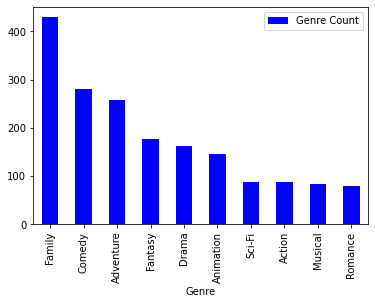

In [72]:
#DISNEY VIDEO GENRES: Bar Graph
top_disney_genres.plot.bar(x='Genre', y='Genre Count', rot=90, color='b')
